In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('./T2_data/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [3]:
labels = pd.read_csv('./T2_data/malware_label.csv', header=None)

labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels

,label
0,high
1,high
2,high
3,high
4,high
...,...
27995,zbot
27996,zbot
27997,zbot
27998,zbot


In the cells above, we have created two DataFrames: ***features*** and ***labels***.

***Features***: This table contains 28000 instances of malware, where each instance of malware is characterised by 256 distinct features relating to how it performs and its impact on the associated systems.

***Labels***: This table contains 28000 rows, where each row is the label of the malware class, related to the features table. There are 2000 samples of each malware varient, and 14 varients in total.

## Part 1: Developing a Classifier "by hand"

In [4]:


mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

#train_data~
test_data

,x,y,labels
0,1478119.0,10575.0,wannacry
1,53767.0,21413.0,wannacry
2,4085568.0,6635.0,wannacry
3,2647584.0,19566.0,wannacry
4,4470838.0,5131.0,wannacry
...,...,...,...
85,69418.0,9673.0,razy
86,8060.0,1580.0,razy
87,4394.0,540.0,razy
88,183380.0,8477.0,razy


Explanation of graph:-----> training data search space is between 0-30000 average.


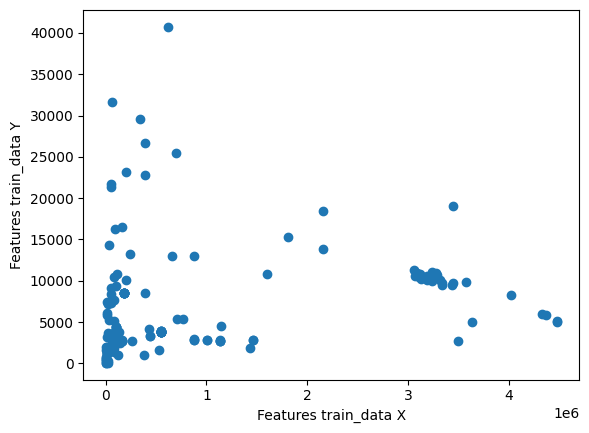

In [5]:
plt.scatter(train_data['x'], train_data['y'])
plt.xlabel('Features train_data X')
plt.ylabel('Features train_data Y')
print('Explanation of graph:----->', 'training data search space is between 0-30000 average.')

### Task 1: Find the Centroid point of each of the three groups (3)

In [12]:
values = pd.unique(train_data['labels'])
#print(values)
waanacry = train_data[train_data['labels'] == 'wannacry']
startsurf = train_data[train_data['labels'] == 'startsurf']
razy = train_data[train_data['labels'] == 'razy']
df1 = waanacry.mean()
df2 = startsurf.mean()
df3 = razy.mean()
centroids = [df1,df2,df3]
all_data = np.vstack([waanacry,startsurf,razy])
all_data = all_data[:, 0:2]


test_data = [test_data]
test_data = np.vstack(test_data)



all_data = (all_data)
centroid = [df1,df2,df3]
centroids = np.vstack(centroid)

print('Explanation of graph:----->', 'Below are centroids of the 3 malware variants')
print(centroids)


Explanation of graph:-----> Below are centroids of the 3 malware variants
[[2181660.66   11087.1 ]
 [ 478778.12    3754.04]
 [ 100505.22    6158.28]]


/tmp/ipykernel_3704/2191271686.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = waanacry.mean()
/tmp/ipykernel_3704/2191271686.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = startsurf.mean()
/tmp/ipykernel_3704/2191271686.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3 = razy.mean()


### Task 2: Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)

Explanation of graph:-----> Centroids of the 3 malware variants and the search space is around 10000-13000


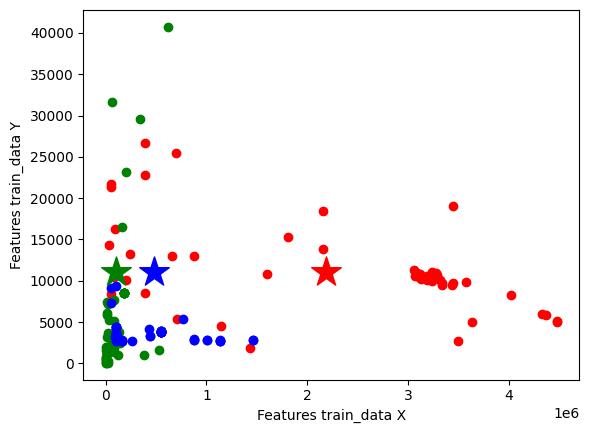

In [13]:
plt.scatter(waanacry ['x'], waanacry ['y'],color='r')
plt.scatter(razy ['x'], razy ['y'],color='g')
plt.scatter(startsurf ['x'], startsurf ['y'],color='b')
plt.xlabel('Features train_data X')
plt.ylabel('Features train_data Y')
#plt.subplots(figsize=(35, 25))
plt.scatter(df1['x'], df1['y'],marker='*', color='r',s=500)
plt.scatter(df2['x'], df1['y'],marker='*', color='b',s=500)
plt.scatter(df3['x'], df1['y'],marker='*', color='g',s=500)
#centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])
print('Explanation of graph:----->', 'Centroids of the 3 malware variants and the search space is around 10000-13000')

### Task 3: For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task*

In [14]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

group1 = []
group2 = []
group3 = []



def find_groups(centroids, all_data):
    
    score = 0

    print(all_data[0][0])
    print(all_data[0][0][0])
    print(all_data[0][1][2])
    #print(all_data[0][1][2])
    
    
    for i in range(all_data.shape[1]):
        
        distance1 = [np.sqrt(np.abs(all_data[0][i][0] - centroids[0,0]) ** 2 + np.abs(all_data[0][i][1] - centroids[0,1]) ** 2)]
        distance2 = [np.sqrt(np.abs(all_data[0][i][0] - centroids[1,0]) ** 2 + np.abs(all_data[0][i][1] - centroids[1,1]) ** 2)]
        distance3 = [np.sqrt(np.abs(all_data[0][i][0] - centroids[2,0]) ** 2 + np.abs(all_data[0][i][1] - centroids[2,1]) ** 2)]
        distances = [distance1, distance2, distance3]
        labels = ['wannacry', 'startsurf','razy']
        p = np.argmin(distances)
        #print(all_data.shape[0])
        #print(all_data[0][i][2])
        #print(p)
        if labels[p] == all_data[0][i][2]:
            #print(all_data[0][i][2])
            score = score + 1
            print('score',score)
score = find_groups(centroids, test_data)       
    
print(score)
print('Explanation of graph:----->', 'Calculating score of the 3 malware variants, the final score is 63, the score may depend on the search space')

            



        


[1478119.0 10575.0 'wannacry']
1478119.0
wannacry
score 1
score 2
score 3
score 4
score 5
score 6
score 7
score 8
score 9
score 10
score 11
score 12
score 13
score 14
score 15
score 16
score 17
score 18
score 19
score 20
score 21
score 22
score 23
score 24
score 25
score 26
score 27
score 28
score 29
score 30
score 31
score 32
score 33
score 34
score 35
score 36
score 37
score 38
score 39
score 40
score 41
score 42
score 43
score 44
score 45
score 46
score 47
score 48
score 49
score 50
score 51
score 52
score 53
score 54
score 55
score 56
score 57
score 58
score 59
score 60
score 61
score 62
score 63
None
Explanation of graph:-----> Calculating score of the 3 malware variants, the final score is 63, the score may depend on the search space


### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier (2)

In [15]:
#from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

group1 = []
group2 = []
group3 = []
accuracy  = 0


#print(centroids)
def accuracy_score(centroids, all_data):
    
    accuracy = 0
    #group1 = []
    #group2 = []
    #group3 = []
    
    print(all_data[0][0])
    print(all_data[0][1][0])
    
    print(all_data[0][3][1])
    

    for i in range(all_data.shape[1]):
        
                
        distance1 = [np.sqrt(np.abs(all_data[0][i][0] - centroids[0,0]) ** 2 + np.abs(all_data[0][i][1] - centroids[0,1]) ** 2)]
        distance2 = [np.sqrt(np.abs(all_data[0][i][0] - centroids[1,0]) ** 2 + np.abs(all_data[0][i][1] - centroids[1,1]) ** 2)]
        distance3 = [np.sqrt(np.abs(all_data[0][i][0] - centroids[2,0]) ** 2 + np.abs(all_data[0][i][1] - centroids[2,1]) ** 2)]
        distances = [distance1, distance2, distance3]
        labels = ['wannacry', 'startsurf','razy']
        p = np.argmin(distances)
        #print(p)
        if labels[p] == all_data[0][i][2]:
            #print(all_data[0][i][2])
            accuracy = accuracy + 1
            print(accuracy)
accuracy = accuracy_score(centroids, test_data)
print('Explanation of graph:----->', 'Calculating score of the 3 malware variants, the final score is 63, the score may depend on the search space')

print(accuracy)


[1478119.0 10575.0 'wannacry']
53767.0
19566.0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
Explanation of graph:-----> Calculating score of the 3 malware variants, the final score is 63, the score may depend on the search space
None


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification.



### Task 5: Scale the Input Features for further processing using the StandardScaler function (1)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)
print(features_scaled)



[[-0.0978198   0.67215876  0.82663021 ...  0.1357412   0.17814439
   0.40617301]
 [-0.35508456 -0.29156716 -0.27456922 ... -0.16889972 -0.21809863
  -0.2386657 ]
 [-0.35178418  0.37984379  0.24155808 ...  0.21077877  0.19202385
  -0.23072864]
 ...
 [-0.35058059 -0.37961299 -0.38237754 ... -0.31013839 -0.34541401
  -0.26045037]
 [-0.34595246  0.01402847 -0.18442612 ... -0.37112451 -0.38225198
  -0.24646054]
 [-0.37642742 -0.42802765 -0.47665936 ... -0.37851238 -0.39247895
  -0.27324031]]


### Task 6: Obtain numerical labels for each class using the LabelEncoder function (1)

In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


le_scaled = le.fit_transform(labels)
df = [le_scaled] 
print(df)

[array([ 7,  7,  7, ..., 13, 13, 13])]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### (Advanced) Task 7: Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features_scaled, le_scaled, test_size=0.33, random_state=42)
print(X_train,X_test,y_train,y_test)


[[-0.20235246 -0.23317443 -0.23308119 ... -0.08154905 -0.15924136
  -0.22911102]
 [-0.37350333 -0.39795294 -0.44889972 ... -0.3937227  -0.39811422
  -0.28187063]
 [-0.36109365 -0.30456674 -0.32100352 ... -0.19410539 -0.24157892
  -0.23787466]
 ...
 [-0.36337541 -0.26310861 -0.25962949 ... -0.17339039 -0.23270859
  -0.26257462]
 [-0.31839525 -0.34827345 -0.37934922 ... -0.31202157 -0.28551316
  -0.23522601]
 [-0.37416087 -0.3024587  -0.31636009 ... -0.29739069 -0.30513226
  -0.26309901]] [[-0.36042471 -0.30491808 -0.36430855 ... -0.38474137 -0.38350426
  -0.27341807]
 [ 0.08403798  1.0772539   3.3079377  ...  0.18397964  0.89611962
   0.47456674]
 [-0.13442549  1.00424543 -0.47453953 ... -0.39415728 -0.4008275
  -0.28203061]
 ...
 [-0.37350206 -0.39795294 -0.44889972 ... -0.3937227  -0.39811422
  -0.28187063]
 [-0.25785835  0.23551327  0.04219344 ...  0.16239547 -0.0359959
  -0.02308544]
 [-0.34992051 -0.28348633 -0.35794907 ... -0.23234848 -0.29490528
  -0.22512916]] [11  0  3 ...  7  

### (Advanced) Task 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [19]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlp#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 

X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, le_scaled,random_state=1,test_size=0.2)
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

mlp.model = mlp.fit(X_train,y_train)
y_pred = mlp.model.predict(X_test)

accscore = accuracy_score(y_test,y_pred)
print('Explanation of graph:----->', ' the final score is 80%, change values of random_state=1,test_size=0.2,.random_state=1, max_iter=300 to make search deeper to achive highter score')

print(accscore)

Explanation of graph:----->  the final score is 80%, change values of random_state=1,test_size=0.2,.random_state=1, max_iter=300 to make search deeper to achive highter score
0.81625


### (Advanced) Task 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
#https://towardsdatascience.com/random-forest-classification-678e551462f5
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier
    
n_samples = le_scaled
n_features = features_scaled
X_train, X_test, y_train, y_test = train_test_split(n_features, n_samples,random_state=1,test_size=0.2)


clf = RandomForestClassifier(n_estimators = 900, max_depth = 10, max_features = 6, bootstrap = True, random_state = 15).fit(X_train, y_train)
# Create our predictions
y_pred = clf.predict(X_test)
# Create confusion matrix
confusion_matrix(y_test, y_pred)# Display accuracy score
#print(accuracy_score(y_test, y_pred))# Display F1 score
print(f1_score(y_test,y_pred,pos_label='positive',average='micro'))


0.8144642857142858


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### (Advanced) Task 10: Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

*Marks wil be awarded for how your tuning improves accuracy beyond 80%.*

In [21]:
"""
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://github.com/scikit-learn/scikit-learn/issues/15568
RandomizedSearchCV + MLP

"""


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

# Create the model
clf = RandomForestClassifier()

# Define the parameter space
param_dist = {"max_depth": [6, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=30, cv=7, n_jobs=None)
random_search.fit(X_train, y_train)

# Print the best accuracy score
print("Accuracy score: ", random_search.best_score_)


Accuracy score:  0.875580357142857
